In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #for custom legends
import seaborn as sns
from lifelines import KaplanMeierFitter #survival analysis library
from lifelines.statistics import logrank_test #survival statistical testing
from IPython.display import Image
from IPython.core.display import HTML 
%matplotlib inline

In [2]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)

In [3]:
df = pd.read_csv('Obituaries_Dataset.csv')
print(df.shape)
display_all(df.tail().transpose())

(1291, 39)


,1286,1287,1288,1289,1290
Name,Faith Wangui Mwathi,Mama Agnes Omwenga Nyakundi,Mrs Jane Wanjiru Kaniu(Nyina Wa Andu),Snr. Insp. Of Police Betty Cherono Soi,Mzee Muliko Kimanga
Announcement,3/17/2017,3/17/2017,3/17/2017,3/17/2017,3/17/2017
Death,3/13/2017,03/12/2017,03/11/2017,NaN,03/12/2017
Burial,3/18/2017,3/24/2017,3/22/2017,3/18/2017,3/18/2017
Burial_Day,Saturday,Friday,Wednesday,Saturday,Saturday
Burial_Week,Weekend,Weekday,Weekday,Weekend,Weekend
Gender,Female,Female,Female,Female,Male
Age,NaN,NaN,73,NaN,70
Color,Yes,Yes,Yes,Yes,Yes
Size,110,130.24,131.22,54.56,54.56


In [4]:
# temporarily remove columns with datetimes
df_clean_stage1 = df.drop([], axis = 1)

In [5]:
numeric_predictors = df_clean_stage1.dtypes[df_clean_stage1.dtypes != "object"].index

In [6]:
# let's deal with missing values 

# remove NaNs and replace with zeros
df_clean_stage2 = numeric_predictors.fillna(0)

# confirmation
numeric_predictors = pd.isnull(df_clean_stage2).any()

# formatting the text in cooler way
# msg1 = "They are {} columns with not applicable values"
numeric_predictors

False

In [7]:
df_clean_stage3 = df_clean_stage1.fillna(0)

# confirmation
object_predictors = pd.isnull(df_clean_stage3).any()

msg2 = "They are {} columns with not applicable values"
print (msg2.format(sum(object_predictors == True)))

They are 0 columns with not applicable values


In [8]:

df_clean_stage3["Fundraising"] = df.Fundraising.apply(lambda x: 1 if x == "Yes" else 0) #recode fundraising var

In [9]:
df_clean_stage3.Fundraising.dtype

dtype('int64')

In [10]:
df_clean_stage3.Gender.value_counts()

Male      714
Female    577
Name: Gender, dtype: int64

In [11]:
#recode Genders var to get our two comparison cohorts
df_clean_stage3["Gender"] = df.Gender.apply(lambda x: 1 if x == "Yes" else 0)

In [12]:
df_clean_stage3.Gender.dtype

dtype('int64')

In [13]:
df_clean_stage3.Death_to_Burial.describe()

count     1291
unique     173
top          7
freq       109
Name: Death_to_Burial, dtype: object

In [14]:
df_clean_stage3.Fundraising.describe()

count    1291.000000
mean        0.536793
std         0.498838
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Fundraising, dtype: float64

In [15]:
display_all(df_clean_stage3.tail().transpose())

,1286,1287,1288,1289,1290
Name,Faith Wangui Mwathi,Mama Agnes Omwenga Nyakundi,Mrs Jane Wanjiru Kaniu(Nyina Wa Andu),Snr. Insp. Of Police Betty Cherono Soi,Mzee Muliko Kimanga
Announcement,3/17/2017,3/17/2017,3/17/2017,3/17/2017,3/17/2017
Death,3/13/2017,03/12/2017,03/11/2017,0,03/12/2017
Burial,3/18/2017,3/24/2017,3/22/2017,3/18/2017,3/18/2017
Burial_Day,Saturday,Friday,Wednesday,Saturday,Saturday
Burial_Week,Weekend,Weekday,Weekday,Weekend,Weekend
Gender,0,0,0,0,0
Age,0,0,73,0,70
Color,Yes,Yes,Yes,Yes,Yes
Size,110,130.24,131.22,54.56,54.56


In [16]:
df_clean_stage3['Death_to_Burial'] = (df_clean_stage3['Death_to_Burial'] !='n').astype(int)

In [17]:
df_clean_stage3['Death_to_Announce'] = (df_clean_stage3['Death_to_Announce'] !='n').astype(int)

In [18]:
df_clean_stage3['Announce_to_Burial'] = (df_clean_stage3['Announce_to_Burial'] !='n').astype(int)

In [19]:
# Death to Announce: Time in days between death to announcement on newspaper
# Death to Burial: Time in days between death and burial
# Announce to Burial: Time in days between between announcement of death and burial
kmf = KaplanMeierFitter()
T = df_clean_stage3["Announce_to_Burial"] #duration
E = df_clean_stage3["Fundraising"] #observed - 1 if death/churn is seen, 0 if censored

In [20]:
T.dtype

dtype('int64')

In [21]:
E.dtype

dtype('int64')

In [22]:
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 1291 observations, 598 censored>

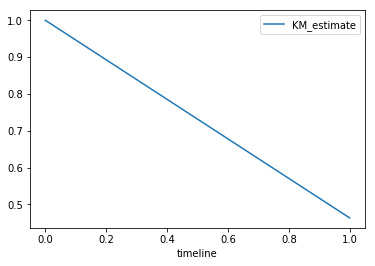

In [23]:
kmf.survival_function_.plot()

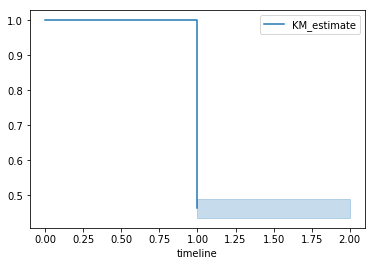

In [24]:
kmf.plot()

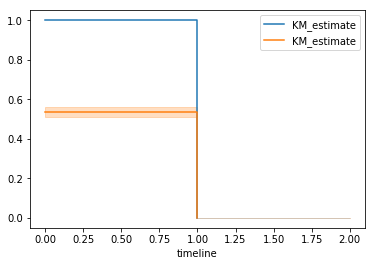

In [25]:
kmf.fit(T)
ax = kmf.plot()

kmf.fit(E)
ax = kmf.plot(ax=ax)

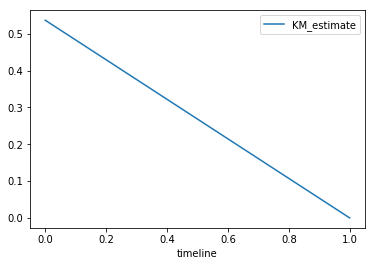

In [26]:
kmf.survival_function_.plot()

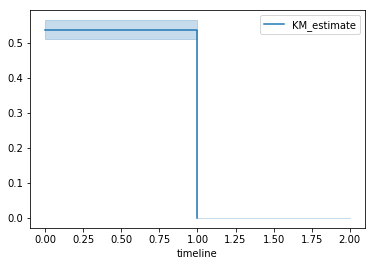

In [27]:
kmf.plot()

In [28]:
kmf.median_

1.0

In [29]:
multi = (df_clean_stage3["Fundraising"] == 1)
results = logrank_test(T[multi], T[~multi], E[multi], E[~multi], alpha=0.99 ) #at 99% confidence level
results.print_summary()


t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p     
     1290.0000 0.0000  ***
---
Signif. codes: 0 '***' 0.0001 '**' 0.001 '*' 0.01 '.' 0.05 ' ' 1


In [30]:

# Image Credit: https://en.wikipedia.org/wiki/Log-rank_test
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/68750c8d50ac1d055b3ddcc67a05de43b40fdebf")

In [31]:
Z = results.test_statistic
D = E.sum() #number of events observed

hazard_ratio = np.exp(Z*np.sqrt(4/D))
print(hazard_ratio)

3.660214856085173e+42


 Therefore the probability of fundraising is 3.6 times higher in users who fundraised compared to user who did not fundraise

In [32]:
kmf.fit(durations = df_clean_stage3.Death_to_Burial, 
        event_observed = df_clean_stage3.Fundraising)

<lifelines.KaplanMeierFitter: fitted with 1291 observations, 598 censored>

In [33]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,1291,1291
1.0,1291,693,598,0,1291


In [34]:
# get the values for time = 0 from the survival table
event_at_0 = kmf.event_table.iloc[0, :]
# now calculate the survival probability for t = 0
surv_for_0 =  (event_at_0.at_risk - event_at_0.observed) / event_at_0.at_risk
surv_for_0

1.0

In [35]:
# Calculate the survival probability for t = 1
event_at_1 = kmf.event_table.iloc[1, :]
surv_for_1 =  (event_at_1.at_risk - event_at_1.observed) / event_at_1.at_risk
surv_for_1

0.4632068164213788

In [36]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.463207


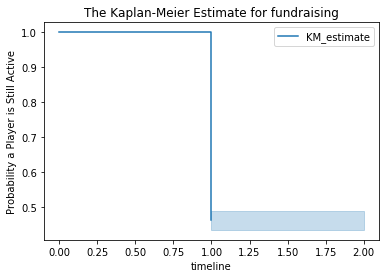

In [37]:
kmf.plot()
# Add title and y-axis label
plt.title("The Kaplan-Meier Estimate for fundraising")
plt.ylabel("Probability a Player is Still Active")

plt.show()